# Titanic - Machine Learning from Disaster
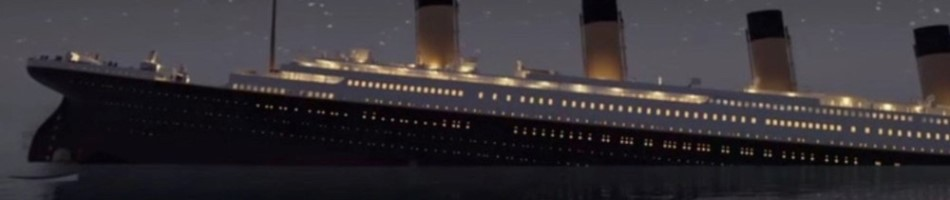

### A competição é simples: usar aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
!pip install scikit-learn
!pip install matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
#Lendo os arquivo de treino
train = pd.read_csv("C:/Users/Acer/Documents/Kaggle/Titanic/train.csv")
test = pd.read_csv("C:/Users/Acer/Documents/Kaggle/Titanic/test.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#Saber quantas colunas e linhas tem na tabela treino
train.shape

(891, 12)

In [7]:
# Ver as informações 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Somando os valores nulos do dataframe
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# Vendo a tabela de teste, ela possui somente 11 colunas, do contrário da tabela de treino que possui 12 colunas
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
#Separando a coluna de passageiro ID da tabela teste e fazendo uma união entre as tabelas treino e teste.
passengerID = test["PassengerId"]
titanic_df = pd.concat([train, test],ignore_index=True)

In [13]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [15]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
#Tamanho do data frame de treino e onde começa o data frame teste
train_index = len(train)
test_index = len(titanic_df) - len(test)

In [17]:
df = pd.DataFrame()

### Survived

In [18]:
#Para saber a quantidade de opções
titanic_df["Survived"].nunique()

2

In [19]:
#Para saber a quantidade de opções
titanic_df["Survived"].unique()

array([ 0.,  1., nan])

In [20]:
#Quantidade de valores nulos
titanic_df["Survived"].isnull().sum()

418

In [21]:
#Para saber quantos sobreviveram no desastre
titanic_df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

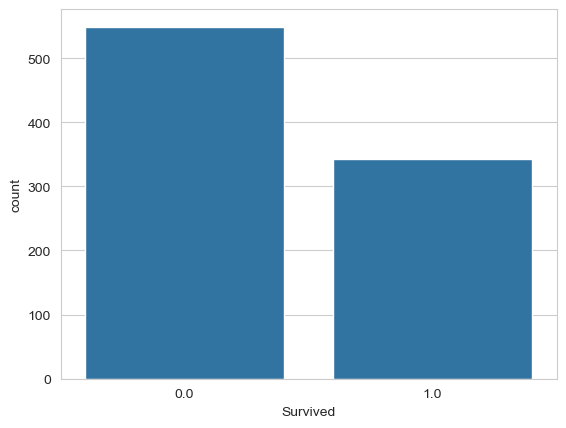

In [22]:
sns.countplot(data=titanic_df,x="Survived")

Quantidade de valores únicos: 2

Quais são os valores únicos: [ 0.  1. nan]

Quantidade de valores nulos: 418

Quantidade por opção: 
Survived
0.0    549
1.0    342
Name: count, dtype: int64


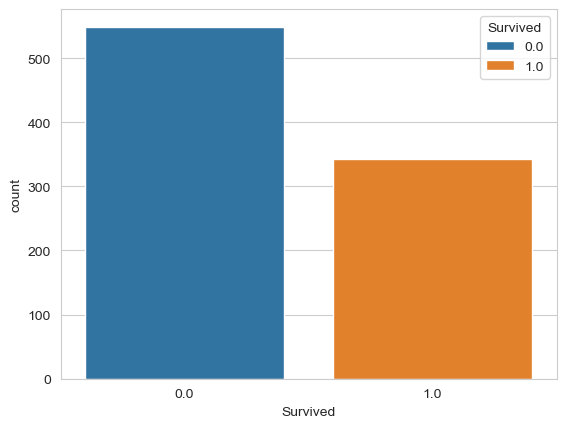

In [23]:
# Criando uma função para ajudar no momento de visualizar as informações de cada coluna

def titanic_func(data, column, count = True):
    print(f'Quantidade de valores únicos: {data[column].nunique()}')
    print(f'\nQuais são os valores únicos: {data[column].unique()}')
    print(f'\nQuantidade de valores nulos: {data[column].isnull().sum()}')
    print(f'\nQuantidade por opção: \n{data[column].value_counts()}')
    
    if count == True:
        sns.countplot(data = data, x = column, hue = 'Survived')
    else:
        sns.displot(data[column], kde = True)
    
    
titanic_func(titanic_df, 'Survived')

In [24]:
df["Survived"] = titanic_df["Survived"]

### Pclass

Quantidade de valores únicos: 3

Quais são os valores únicos: [3 1 2]

Quantidade de valores nulos: 0

Quantidade por opção: 
Pclass
3    709
1    323
2    277
Name: count, dtype: int64


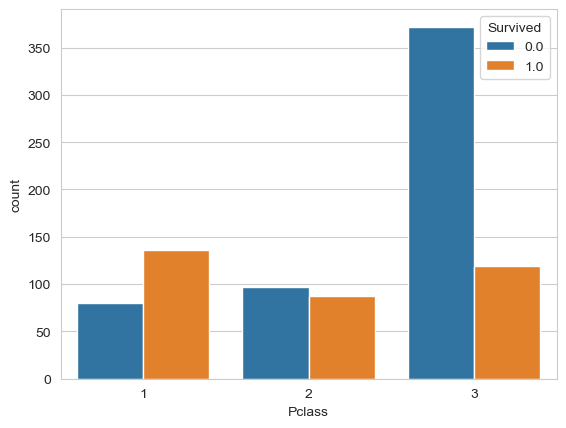

In [25]:
titanic_func(titanic_df,'Pclass')

In [26]:
df['Pclass'] = titanic_df['Pclass']
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


In [27]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Analisando o Sexo

In [ ]:
#Convertendo os valores male e female por 0 e 1, respectivamente
#titanic_df['Sex'].map({'female':1, 'male':0})
titanic_df['Sex'] = titanic_df['Sex'].replace(['male','female'],[0,1])

Quantidade de valores únicos: 2

Quais são os valores únicos: [0 1]

Quantidade de valores nulos: 0

Quantidade por opção: 
Sex
0    843
1    466
Name: count, dtype: int64


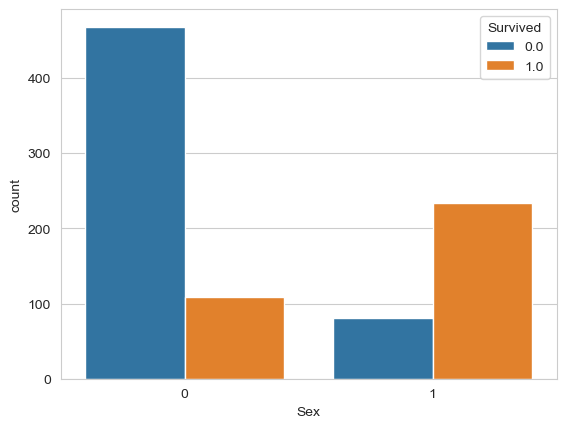

In [29]:
titanic_func(titanic_df,'Sex')

In [30]:
#Colocando em df a coluna Sex que está no dataframe titanic_df
df['Sex'] = titanic_df['Sex']
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


In [31]:
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


Quantidade de valores únicos: 98

Quais são os valores únicos: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5
  0.33  0.17 38.5 ]

Quantidade de valores nulos: 263

Quantidade por opção: 
Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64


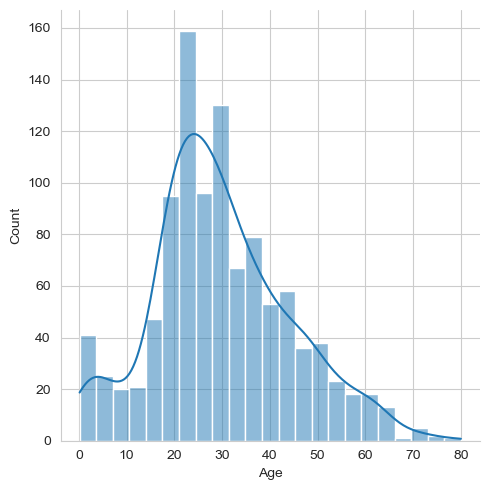

In [32]:
titanic_func(titanic_df,'Age', False)

In [33]:
titanic_df['Age'].mean()

29.881137667304014

In [34]:
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


In [35]:
#Média de idade dos passageiros 1º classe
titanic_df[titanic_df['Pclass'] ==1]['Age'].mean()

39.15992957746479

In [36]:
#Média de idade dos passageiros 2º classe
titanic_df[titanic_df['Pclass'] ==2]['Age'].mean()

29.506704980842912

In [37]:
#Média de idade dos passageiros 3º classe
titanic_df[titanic_df['Pclass'] ==3]['Age'].mean()

24.81636726546906

In [38]:
for i in titanic_df['Pclass'].unique():
    print(f'Pessoas da {i}º classe tem a média de idade de: {titanic_df[titanic_df["Pclass"] ==i]["Age"].mean():.2f}')

Pessoas da 3º classe tem a média de idade de: 24.82
Pessoas da 1º classe tem a média de idade de: 39.16
Pessoas da 2º classe tem a média de idade de: 29.51


In [39]:
titanic_df["Age"].isnull().sum()

263

In [40]:
pd.isnull(titanic_df['Age'][4])

False

In [41]:
# Calculando as médias das idades por Pclass uma vez antes do loop
mean_age_pclass_1 = round(titanic_df[titanic_df['Pclass'] == 1]['Age'].mean())
mean_age_pclass_2 = round(titanic_df[titanic_df['Pclass'] == 2]['Age'].mean())
mean_age_pclass_3 = round(titanic_df[titanic_df['Pclass'] == 3]['Age'].mean())

for i in titanic_df.index:
    if pd.isnull(titanic_df['Age'][i]): 
        if titanic_df['Pclass'][i] == 1:
            titanic_df.loc[i, 'Age'] = mean_age_pclass_1  # Usando .loc para atribuição
        elif titanic_df['Pclass'][i] == 2:
            titanic_df.loc[i, 'Age'] = mean_age_pclass_2
        elif titanic_df['Pclass'][i] == 3:
            titanic_df.loc[i, 'Age'] = mean_age_pclass_3

In [42]:
#Agora sem valores nulos na idade
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [43]:
df['Age'] = titanic_df['Age']
df

,Survived,Pclass,Sex,Age
0,0.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,0.0,3,0,35.0
...,...,...,...,...
1304,NaN,3,0,25.0
1305,NaN,1,1,39.0
1306,NaN,3,0,38.5
1307,NaN,3,0,25.0


### SibSp: O conjunto de dados define as relações familiares desta forma...
Irmão = irmão, irmã, meio-irmão, meia-irmã

Cônjuge = marido, esposa (amantes e noivos foram ignorados)

Quantidade de valores únicos: 7

Quais são os valores únicos: [1 0 3 4 2 5 8]

Quantidade de valores nulos: 0

Quantidade por opção: 
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


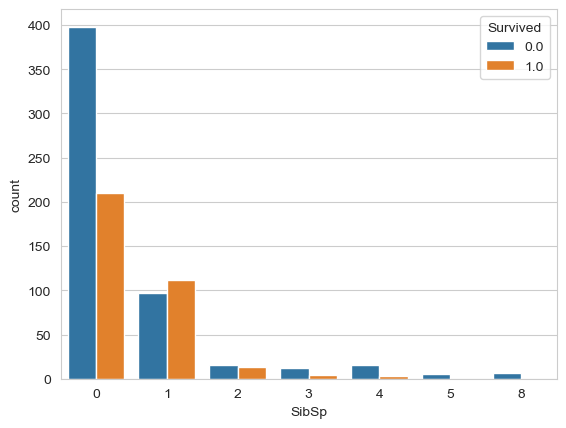

In [44]:
titanic_func(titanic_df, 'SibSp')

In [45]:
df['SibSp'] = titanic_df['SibSp']
df

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.0,1
1,1.0,1,1,38.0,1
2,1.0,3,1,26.0,0
3,1.0,1,1,35.0,1
4,0.0,3,0,35.0,0
...,...,...,...,...,...
1304,NaN,3,0,25.0,0
1305,NaN,1,1,39.0,0
1306,NaN,3,0,38.5,0
1307,NaN,3,0,25.0,0


### Parch: O conjunto de dados define as relações familiares desta forma...
Pai = mãe, pai

Filho = filha, filho, enteada, enteado

Algumas crianças viajaram apenas com uma babá, portanto parch=0 para elas.

Quantidade de valores únicos: 8

Quais são os valores únicos: [0 1 2 5 3 4 6 9]

Quantidade de valores nulos: 0

Quantidade por opção: 
Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


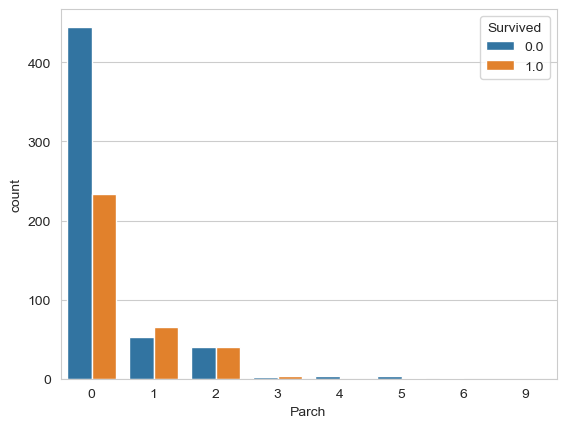

In [46]:
titanic_func(titanic_df, 'Parch')

### FAMILY SIZE

In [47]:
# Fazendo o tamanho total da família
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S,1


In [48]:
# Colocando no novo dataframe df a coluna tamanho da família
df['FamilySize'] = titanic_df['FamilySize']
df

,Survived,Pclass,Sex,Age,SibSp,FamilySize
0,0.0,3,0,22.0,1,2
1,1.0,1,1,38.0,1,2
2,1.0,3,1,26.0,0,1
3,1.0,1,1,35.0,1,2
4,0.0,3,0,35.0,0,1
...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,1
1305,NaN,1,1,39.0,0,1
1306,NaN,3,0,38.5,0,1
1307,NaN,3,0,25.0,0,1


In [49]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


### Fare: Tarifas dos passageiros

Quantidade de valores únicos: 281

Quais são os valores únicos: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      1

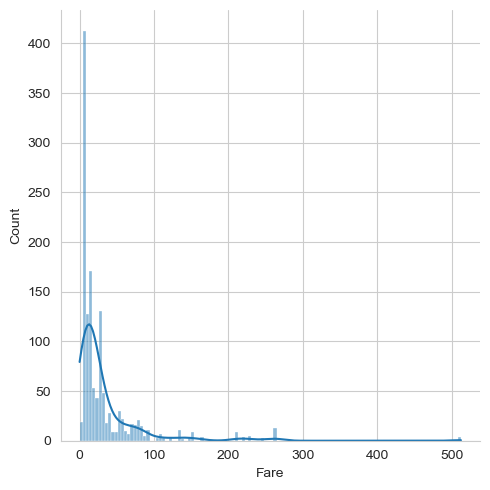

In [50]:
titanic_func(titanic_df, 'Fare', False)

In [51]:
titanic_df[titanic_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,1


In [52]:
titanic_df[titanic_df['Pclass']==3]['Fare'].mean()

13.302888700564973

In [ ]:
#Substituindo os valores nulos pela média da classe 3
titanic_df['Fare'].fillna(titanic_df[titanic_df['Pclass']==3]['Fare'].mean(),inplace = True)

In [54]:
# Conferindo os valores nulos
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
dtype: int64

### Cabin : Número de cabines

In [55]:
titanic_df['Cabin'].isnull().sum()

1014

In [56]:
titanic_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Embaked: Ponto de embarque

Quantidade de valores únicos: 3

Quais são os valores únicos: ['S' 'C' 'Q' nan]

Quantidade de valores nulos: 2

Quantidade por opção: 
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64


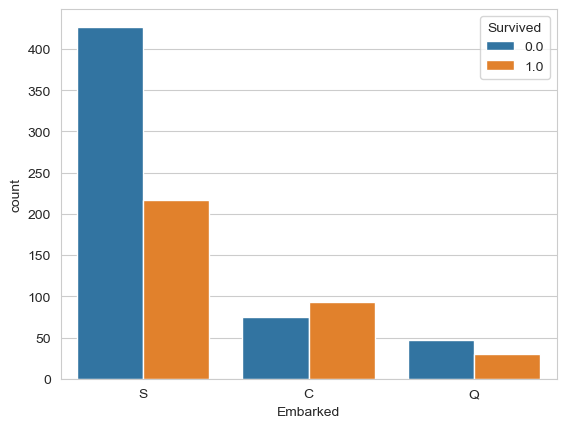

In [57]:
titanic_func(titanic_df, "Embarked")

In [58]:
#33% das pessoas que passaram no portão S sobreviveram
titanic_df[titanic_df['Embarked'] == 'S']['Survived'].mean()

0.33695652173913043

In [59]:
#55% das pessoas que passaram no portão C sobreviveram
titanic_df[titanic_df['Embarked'] == 'C']['Survived'].mean()

0.5535714285714286

In [60]:
#38% das pessoas que passaram no portão Q sobreviveram
titanic_df[titanic_df['Embarked'] == 'Q']['Survived'].mean()

0.38961038961038963

In [61]:
#classe das pessoas que passaram no portão S sobreviveram
titanic_df[titanic_df['Embarked'] == 'S']['Pclass'].mean()

2.3479212253829322

In [62]:
#classe das pessoas que passaram no portão C sobreviveram
titanic_df[titanic_df['Embarked'] == 'C']['Pclass'].mean()

1.8518518518518519

In [63]:
#classe das pessoas que passaram no portão Q sobreviveram
titanic_df[titanic_df['Embarked'] == 'Q']['Pclass'].mean()

2.894308943089431

In [64]:
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1


In [ ]:
# Preenchendo os valores nulos como se tivessem passado pelo portão C.
titanic_df['Embarked'].fillna("C", inplace=True)

In [66]:
#Conferindo que completou-se os valores nulos
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
FamilySize        0
dtype: int64

In [67]:
df['Embarked'] = titanic_df['Embarked']
df

,Survived,Pclass,Sex,Age,SibSp,FamilySize,Embarked
0,0.0,3,0,22.0,1,2,S
1,1.0,1,1,38.0,1,2,C
2,1.0,3,1,26.0,0,1,S
3,1.0,1,1,35.0,1,2,S
4,0.0,3,0,35.0,0,1,S
...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,1,S
1305,NaN,1,1,39.0,0,1,C
1306,NaN,3,0,38.5,0,1,S
1307,NaN,3,0,25.0,0,1,S


In [68]:
titanic_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,Q,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


### Name

In [69]:
titanic_df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [70]:
#Captando as siglas dos nomes (Mr, Mrs, Miss, etc...)
#[titanic_df['Name'][n].split(',')[1].split('.')[0].strip() for n in titanic_df.index]
titanic_df['Title'] = titanic_df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [148]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,1,Person
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S,1,Mr


In [149]:
titanic_df['Title'].nunique()

5

In [150]:
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [74]:
titanic_df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [81]:
# Fazendo um List comprehension - Substituindo os Titulos a partir de Rev. para baixo em 'Person' para simplificação.
titanic_df['Title'] = [n if n in ['Mr','Miss', 'Mrs', 'Master'] else 'Person' for n in titanic_df['Title']] 

In [82]:
titanic_df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,Mr
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,Q,1,Mr
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,1,Mr
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,5,Master
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,3,Mrs
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2,Mrs


In [83]:
df['Title'] = titanic_df['Title']
df

,Survived,Pclass,Sex,Age,SibSp,FamilySize,Embarked,Title
0,0.0,3,0,22.0,1,2,S,Mr
1,1.0,1,1,38.0,1,2,C,Mrs
2,1.0,3,1,26.0,0,1,S,Miss
3,1.0,1,1,35.0,1,2,S,Mrs
4,0.0,3,0,35.0,0,1,S,Mr
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,1,S,Mr
1305,NaN,1,1,39.0,0,1,C,Person
1306,NaN,3,0,38.5,0,1,S,Mr
1307,NaN,3,0,25.0,0,1,S,Mr


In [84]:
# O data frame do modelo somente com 5 tipos de pessoas
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

Quantidade de valores únicos: 5

Quais são os valores únicos: ['Mr' 'Mrs' 'Miss' 'Master' 'Person']

Quantidade de valores nulos: 0

Quantidade por opção: 
Title
Mr        757
Miss      260
Mrs       197
Master     61
Person     34
Name: count, dtype: int64


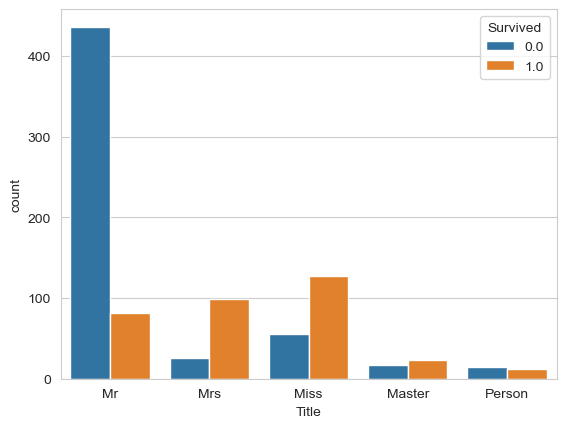

In [151]:
titanic_func(titanic_df, 'Title')

In [87]:
# Colocando a coluna Fare que antes não tinha colocado.
df['Fare'] = titanic_df['Fare']

In [91]:
df

,Survived,Pclass,Sex,Age,SibSp,FamilySize,Embarked,Title,Fare
0,0.0,3,0,22.0,1,2,S,Mr,7.2500
1,1.0,1,1,38.0,1,2,C,Mrs,71.2833
2,1.0,3,1,26.0,0,1,S,Miss,7.9250
3,1.0,1,1,35.0,1,2,S,Mrs,53.1000
4,0.0,3,0,35.0,0,1,S,Mr,8.0500
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,1,S,Mr,8.0500
1305,NaN,1,1,39.0,0,1,C,Person,108.9000
1306,NaN,3,0,38.5,0,1,S,Mr,7.2500
1307,NaN,3,0,25.0,0,1,S,Mr,8.0500


In [108]:
#Conferindo os valores unicos
df['Pclass'] = df['Pclass'].astype(int)
print(df['Pclass'].unique())

[3 1 2]


In [130]:
#Fazendo primeiro da classe - It is used to convert categorical variable(s) into dummy/indicator variable
pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
print(pclass)
int_list = [int(value) for value in pclass.iloc[:,0]]
duo_list = [int(value) for value in pclass.iloc[:,1]]
pclass = pd.DataFrame({
    'Pclass_2': int_list,
    'Pclass_3': duo_list
})

# Exibindo o DataFrame
print(pclass)

      Pclass_2  Pclass_3
0        False      True
1        False     False
2        False      True
3        False     False
4        False      True
...        ...       ...
1304     False      True
1305     False     False
1306     False      True
1307     False      True
1308     False      True

[1309 rows x 2 columns]
      Pclass_2  Pclass_3
0            0         1
1            0         0
2            0         1
3            0         0
4            0         1
...        ...       ...
1304         0         1
1305         0         0
1306         0         1
1307         0         1
1308         0         1

[1309 rows x 2 columns]


In [152]:
print(df['Title'].unique())
df['Title'] = df['Title'].astype(object)
df['Title'].dtype

['Mr' 'Mrs' 'Miss' 'Master' 'Person']


dtype('O')

In [153]:
#df['Title'] = df['Title'].astype(int)
print(df['Title'].unique())
title = pd.get_dummies(df['Title'], prefix='Title', drop_first=True)
print(title)

['Mr' 'Mrs' 'Miss' 'Master' 'Person']
      Title_Miss  Title_Mr  Title_Mrs  Title_Person
0          False      True      False         False
1          False     False       True         False
2           True     False      False         False
3          False     False       True         False
4          False      True      False         False
...          ...       ...        ...           ...
1304       False      True      False         False
1305       False     False      False          True
1306       False      True      False         False
1307       False      True      False         False
1308       False     False      False         False

[1309 rows x 4 columns]


In [158]:
#Passando os valores para booleanos
primeira_list = [int(value) for value in title.iloc[:,0]]
segunda_list = [int(value) for value in title.iloc[:,1]]
terceira_list = [int(value) for value in title.iloc[:,2]]
quarta_list = [int(value) for value in title.iloc[:,3]]

title = pd.DataFrame({
    'Title_Miss': primeira_list,
    'Title_Mr': segunda_list,
    'Title_Mrs': terceira_list,
    'Title_Person': quarta_list
    })

# Exibindo o DataFrame
print(title)

      Title_Miss  Title_Mr  Title_Mrs  Title_Person
0              0         1          0             0
1              0         0          1             0
2              1         0          0             0
3              0         0          1             0
4              0         1          0             0
...          ...       ...        ...           ...
1304           0         1          0             0
1305           0         0          0             1
1306           0         1          0             0
1307           0         1          0             0
1308           0         0          0             0

[1309 rows x 4 columns]


In [160]:
embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
print(embarked)

      Embarked_Q  Embarked_S
0          False        True
1          False       False
2          False        True
3          False        True
4          False        True
...          ...         ...
1304       False        True
1305       False       False
1306       False        True
1307       False        True
1308       False       False

[1309 rows x 2 columns]


In [161]:
int_list = [int(value) for value in embarked.iloc[:,0]]
duo_list = [int(value) for value in embarked.iloc[:,1]]
embarked = pd.DataFrame({
    'Embarked_Q': int_list,
    'Embarked_S': duo_list
})

# Exibindo o DataFrame
print(embarked)

      Embarked_Q  Embarked_S
0              0           1
1              0           0
2              0           1
3              0           1
4              0           1
...          ...         ...
1304           0           1
1305           0           0
1306           0           1
1307           0           1
1308           0           0

[1309 rows x 2 columns]


In [164]:
# Agora temos 3 tabelas com variáveis Dummies
print(pclass)
print(title)
print(embarked)

      Pclass_2  Pclass_3
0            0         1
1            0         0
2            0         1
3            0         0
4            0         1
...        ...       ...
1304         0         1
1305         0         0
1306         0         1
1307         0         1
1308         0         1

[1309 rows x 2 columns]
      Title_Miss  Title_Mr  Title_Mrs  Title_Person
0              0         1          0             0
1              0         0          1             0
2              1         0          0             0
3              0         0          1             0
4              0         1          0             0
...          ...       ...        ...           ...
1304           0         1          0             0
1305           0         0          0             1
1306           0         1          0             0
1307           0         1          0             0
1308           0         0          0             0

[1309 rows x 4 columns]
      Embarked_Q  Embarked

In [165]:
# Tabela Final que vai nos modelos
tabela_final = pd.concat([df,pclass,title, embarked],axis=1)
tabela_final

,Survived,Pclass,Sex,Age,SibSp,FamilySize,Embarked,Title,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,2,S,Mr,7.2500,0,1,0,1,0,0,0,1
1,1.0,1,1,38.0,1,2,C,Mrs,71.2833,0,0,0,0,1,0,0,0
2,1.0,3,1,26.0,0,1,S,Miss,7.9250,0,1,1,0,0,0,0,1
3,1.0,1,1,35.0,1,2,S,Mrs,53.1000,0,0,0,0,1,0,0,1
4,0.0,3,0,35.0,0,1,S,Mr,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,1,S,Mr,8.0500,0,1,0,1,0,0,0,1
1305,NaN,1,1,39.0,0,1,C,Person,108.9000,0,0,0,0,0,1,0,0
1306,NaN,3,0,38.5,0,1,S,Mr,7.2500,0,1,0,1,0,0,0,1
1307,NaN,3,0,25.0,0,1,S,Mr,8.0500,0,1,0,1,0,0,0,1


In [167]:
# Excluindo as colunas originais de Classe, Titulo e Embarque.
tabela_final.drop(['Pclass','Title','Embarked'],axis=1,inplace=True)

,Survived,Sex,Age,SibSp,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S
0,0.0,0,22.0,1,2,7.2500,0,1,0,1,0,0,0,1
1,1.0,1,38.0,1,2,71.2833,0,0,0,0,1,0,0,0
2,1.0,1,26.0,0,1,7.9250,0,1,1,0,0,0,0,1
3,1.0,1,35.0,1,2,53.1000,0,0,0,0,1,0,0,1
4,0.0,0,35.0,0,1,8.0500,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,1,8.0500,0,1,0,1,0,0,0,1
1305,NaN,1,39.0,0,1,108.9000,0,0,0,0,0,1,0,0
1306,NaN,0,38.5,0,1,7.2500,0,1,0,1,0,0,0,1
1307,NaN,0,25.0,0,1,8.0500,0,1,0,1,0,0,0,1


In [170]:
#Adicionando a coluna de Parch que faltou
tabela_final['Parch'] = titanic_df['Parch']
tabela_final

,Survived,Sex,Age,SibSp,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Parch
0,0.0,0,22.0,1,2,7.2500,0,1,0,1,0,0,0,1,0
1,1.0,1,38.0,1,2,71.2833,0,0,0,0,1,0,0,0,0
2,1.0,1,26.0,0,1,7.9250,0,1,1,0,0,0,0,1,0
3,1.0,1,35.0,1,2,53.1000,0,0,0,0,1,0,0,1,0
4,0.0,0,35.0,0,1,8.0500,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,25.0,0,1,8.0500,0,1,0,1,0,0,0,1,0
1305,NaN,1,39.0,0,1,108.9000,0,0,0,0,0,1,0,0,0
1306,NaN,0,38.5,0,1,7.2500,0,1,0,1,0,0,0,1,0
1307,NaN,0,25.0,0,1,8.0500,0,1,0,1,0,0,0,1,0


In [173]:
#Dividindo a tabela final com os dados de treino e dados de teste
train = tabela_final[:train_index].copy()
test = tabela_final[test_index:].copy()

In [174]:
train

,Survived,Sex,Age,SibSp,FamilySize,Fare,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Person,Embarked_Q,Embarked_S,Parch
0,0.0,0,22.0,1,2,7.2500,0,1,0,1,0,0,0,1,0
1,1.0,1,38.0,1,2,71.2833,0,0,0,0,1,0,0,0,0
2,1.0,1,26.0,0,1,7.9250,0,1,1,0,0,0,0,1,0
3,1.0,1,35.0,1,2,53.1000,0,0,0,0,1,0,0,1,0
4,0.0,0,35.0,0,1,8.0500,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0,27.0,0,1,13.0000,1,0,0,0,0,1,0,1,0
887,1.0,1,19.0,0,1,30.0000,0,0,1,0,0,0,0,1,0
888,0.0,1,25.0,1,4,23.4500,0,1,1,0,0,0,0,1,2
889,1.0,0,26.0,0,1,30.0000,0,0,0,1,0,0,0,0,0


In [175]:
#Transformando os dados do Survived em inteiro
train['Survived'] = train['Survived'].astype(int)

In [177]:
# separando a coluna Survived da tabela e colocada no y
X = train.drop('Survived',axis=1)
y = train['Survived']

In [178]:
X_test = test.drop('Survived',axis=1)

-------------------------------------

### Criando os modelos

In [180]:
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train,y_train)
    acuracia = round(modelo.score(X_train, y_train)*100,2)

    train_pred = model_selection.cross_val_predict(algoritmo,X_train,y_train, cv=vc, n_jobs= -1)
    acuracia_vc = round(metrics.accuracy_score(y_train,train_pred)*100,2)

    return acuracia, acuracia_vc
    

In [181]:
#Random Forest
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y,10)
print(f"Acuracia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

Acuracia: 98.32
Acurácia Validação Cruzada: 80.36


In [182]:
#Logistic Regression
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000), X, y, 10)

print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação Cruzada: {acc_vc_log}")

Acurácia: 82.94
Acurácia Validação Cruzada: 82.38


In [183]:
# K-Nearest Neighbours
acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação Cruzada: {acc_vc_knn}")

Acurácia: 80.81
Acurácia Validação Cruzada: 72.39


In [184]:
# Gaussian Naive Bayes
acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 10)

print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação Cruzada: {acc_vc_gaussian}")

Acurácia: 78.79
Acurácia Validação Cruzada: 78.56


In [185]:
# Linear Support Vector Machines (SVC)
acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual=False), X, y, 10)

print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação Cruzada: {acc_vc_linear_svc}")

Acurácia: 83.28
Acurácia Validação Cruzada: 82.72


In [186]:
#Stochastic Gradient Descent
acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 10)

print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação Cruzada: {acc_vc_sgd}")

Acurácia: 72.84
Acurácia Validação Cruzada: 71.38


In [187]:
#Decision Tree Classifier
acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 10)

print(f"Acurácia: {acc_dt}")
print(f"Acurácia Validação Cruzada: {acc_vc_dt}")

Acurácia: 98.32
Acurácia Validação Cruzada: 79.24


In [188]:
#Gradient Boost Classifier
acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 10)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

Acurácia: 89.67
Acurácia Validação Cruzada: 83.16


## Os modelos que apresentaram melhores acurácias foram Random Forest e Decision Tree, mas na validação cruzada foi Gradient Boost Classifier, este é o que vou usar abaixo

In [189]:
params = dict(     
    max_depth = [n for n in range(1, 5)],     
    min_samples_split = [n for n in range(2, 6)], 
    min_samples_leaf = [n for n in range(2, 6)],     
    n_estimators = [n for n in range(10, 50, 10)],
)

In [190]:
gbc = GradientBoostingClassifier()

In [191]:
gbc_cv = GridSearchCV(estimator = gbc, param_grid = params, cv = 10) 
gbc_cv.fit(X, y)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40]})

In [192]:
print(f"Melhor pontuação: {gbc_cv.best_score_}")
print(f"Melhores parâmetros: {gbc_cv.best_estimator_}")

Melhor pontuação: 0.8485143570536829
Melhores parâmetros: GradientBoostingClassifier(max_depth=4, min_samples_leaf=2, n_estimators=30)


In [193]:
gradientBoostingClassifier_pred = gbc_cv.predict(X_test)

In [195]:
kaggle = pd.DataFrame({'PassengerId': passengerID, 'Survived': gradientBoostingClassifier_pred})
# save to csv
kaggle.to_csv('./titanic_gradient_boosting_pred.csv', index=False)